# U.S. Medical Insurance Costs

For this project, I was investigating a medical insurance costs dataset in a insurance.csv file using the Python skills. 

File **insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.


In [431]:
# import csv library
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns



In [432]:
#Create empty lists for the various attributes in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

The helper function below was created to make loading data into the lists as efficient as possible. Without this function, one would have to open **insurance.csv** and rewrite the `for` loop seven times; however, with this function, one can simply call `load_list_data()` each time as shown below.

In [433]:
# helper function to load csv data
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

In [434]:
# look at the data in insurance_csv_dict
load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

Now that all the data from **insurance.csv** neatly organized into labeled lists, the analysis can be started. For analysis our data, let's inplement the next operations:
* show average age of the patients
* write the number of males vs. females counted in the dataset
* find geographical location of the patients
* return the average yearly medical charges of the patients
* creating a dictionary that contains all patient information

To perform these inspections, a class called `PatientsInfo` has been built out which contains fives methods:
* `analyze_ages()`
* `analyze_sexes()`
* `patient_regions()`
* `calc_average_med_charges()`
* `insurance_charges_statistics()`
* `create_patient_dictionary()`

The class has been built out below. 

In [435]:
class PatientsInfo:
    
    # init method that takes in each list parameter
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges
 
    # method that calculates the average ages of the patients
    def analyze_ages(self):
        # initialize total age at zero
        total_age = 0
        # iterate through all ages in the ages list
        for age in self.patients_ages:
            # sum of the total age
            total_age += int(age)
            avg_age = round(total_age/len(self.patients_ages), 2)
        # return total age divided by the length of the patient list
        return ("Average Patient Age: " + str(avg_age) + " years")
    
    # method that calculates the number of males and females
    def analyze_sexes(self):
        females = 0
        males = 0
        for sex in self.patients_sexes:
            # if female add to female variable
            if sex == 'female':
                females += 1
            # if male add to male variable
            elif sex == 'male':
                males += 1
        female_perc = 100 * females/ (females + males)
        male_perc = 100 * males/ (females + males)
        
        # print out the number of each
        print("Count for female: ", females)
        print("Count for male: ", males)
        print ("Percentage of male patients: " + str(round(male_perc, 2)) + "%." )
        print ("Percentage of female patients: " + str(round(female_perc, 2)) + "%.")

    # method to find each unique region patients are from
    def patient_regions(self):
        patient_region = []
        for region in self.patients_regions:
            # if the region is not already in the unique regions list
            # then add it to the unique regions list
            if region not in patient_region: 
                patient_region.append(region)
        # return unique regions list
        return ("The regions all the patients are from: " + str(patient_region))

    # method to find average yearly medical charges for patients
    def calc_average_med_charges(self):
        total_charges = 0
        # iterate through charges in patients charges list
        # add each charge to total_charge
        for charge in self.patients_charges:
            total_charges += float(charge)
        average_med_charges = round(total_charges/len(self.patients_charges), 2)
        return ("Average Yearly Medical Insurance Charges: " +  
                str(average_med_charges) + " dollars.")

     # method to calculate the maximal insurance charge 
    def calc_max_charge(self):
        max_charge = 0
        for charge in self.patients_charges:
            if max_charge < float(charge):
                max_charge = float(charge)
        return ("Max Yearly Medical Insurance Charges: " +  
                str(round(max_charge, 2)) + " dollars.")
    
    # method to calculate the minimal insurance charge 
    def calc_min_charge(self):
        min_charge = float(self.patients_charges[0])
        for j in range(len(self.patients_charges)):
            if   (min_charge > float(self.patients_charges[j])) :
                min_charge = float(self.patients_charges[j])
        return ("Min Yearly Medical Insurance Charges: " +  
                str(round(min_charge, 2)) + " dollars.")
    
    z_value = 1.960 
    
    # method to calculate the range insurance charge 
    def range_insurance_charges(self):
        max_charge = min_charge = float(self.patients_charges[0])
        # calculate the minimal insurance charge 
        for j in range(len(self.patients_charges)):
            if   (min_charge > float(self.patients_charges[j])) :
                min_charge = float(self.patients_charges[j])
                
         # calculate the maximal insurance charge       
        for j in range(len(self.patients_charges)):
            if   (max_charge < float(self.patients_charges[j])) :
                max_charge = float(self.patients_charges[j])
                
        return ('The range of the insurance charge: ' + str(round(max_charge - min_charge, 2)) + ' dollars.')
    
    # Now let's find the statistical parameters: mean, standard deviation, variance and margin of error.

    @staticmethod
    def mean(x : list):
        sum_x_values = 0.00
        for i in range(len(x)):
            sum_x_values += float(x[i])
            
        return(round(sum_x_values / len(x), 2))
    
    @staticmethod
    def std(x : list):
        mu = patient_data.mean(x)
        x2 = [(float(j)-mu) ** 2 for j in x]   
        m = round(sum(x2) / len(x2), 2)
    
        return(round(math.sqrt(m), 2))
    
    @staticmethod
    def margin_error(x : list):
        s = patient_data.std(x)
        z = patient_data.z_value
        me = round(z * s /math.sqrt(len(x)), 2)
                   
        return(me)
    
    def insurance_charges_statistics(self):
        total_square_gaps = 0
        total_medical_cost = 0
        mean_charges = 0
        margin_error = 0
        variance = 0
        standard_deviation = 0
        for charge in self.patients_charges:
            total_medical_cost += float(charge)
            mean_charges = round( total_medical_cost / len(self.patients_charges), 2)
        for charge in self.patients_charges:
            total_square_gaps += (float(charge) - mean_charges)**2
        
        variance = round(total_square_gaps, 2)
        standard_deviation = round(math.sqrt(total_square_gaps/len(self.patients_charges)),2)
        margin_error = round(self.z_value * standard_deviation / math.sqrt(len(self.patients_charges)), 2)
        
        print ("Mean of Insurance Charges: " + str(mean_charges))
        print ("Variance of Insurance Charges: " + str(variance)) 
        print ("Standard Deviation of Insurance Charges: " + str(standard_deviation))
        print ("And the Margin Error for a conficence interval of 95% is " + str(margin_error))
    
    
    # method to create dictionary with all patients information
    def create_patient_dictionary(self):
        # initialize empty dictionary
        patient_information = {}
        # set age, sex, bmi, number of children, smoker and charge as keys tied with the  their values

        patient_information["Age"] = [ int(age) for age in self.patients_ages]
        patient_information["Sex"] = self.patients_sexes
        patient_information["BMI"] = self.patients_bmis
        patient_information["NumberOfChildren"] = self.patients_num_children
        patient_information["Smoker"] = self.patients_smoker_statuses
        patient_information["Region"] = self.patients_regions
        patient_information["Charge"] = self.patients_charges
        return patient_information
   
    
    
    
    

 The next step is to create an instance of the class called `patient_data`. With this instance, each method can be used to see the results of the analysis.

In [436]:
patient_data = PatientsInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)


In [437]:
patient_data.analyze_ages()


'Average Patient Age: 39.21 years'

So, the average age of the patients is about 39 years old.

In [438]:
patient_data.analyze_sexes()

Count for female:  662
Count for male:  676
Percentage of male patients: 50.52%.
Percentage of female patients: 49.48%.


The balance between men and women shows that we have an almost equal number of both sexes.

In [439]:
patient_data.patient_regions()

"The regions all the patients are from: ['southwest', 'southeast', 'northwest', 'northeast']"

There are four unique geographical regions in this dataset.

In [440]:
patient_data.calc_average_med_charges()

'Average Yearly Medical Insurance Charges: 13270.42 dollars.'

In [441]:
patient_data.calc_max_charge()

'Max Yearly Medical Insurance Charges: 63770.43 dollars.'

In [442]:
patient_data.calc_min_charge()

'Min Yearly Medical Insurance Charges: 1121.87 dollars.'

In [443]:
patient_data.range_insurance_charges()

'The range of the insurance charge: 62648.55 dollars.'

In [444]:
patient_data.create_patient_dictionary()

{'Age': [19,
  18,
  28,
  33,
  32,
  31,
  46,
  37,
  37,
  60,
  25,
  62,
  23,
  56,
  27,
  19,
  52,
  23,
  56,
  30,
  60,
  30,
  18,
  34,
  37,
  59,
  63,
  55,
  23,
  31,
  22,
  18,
  19,
  63,
  28,
  19,
  62,
  26,
  35,
  60,
  24,
  31,
  41,
  37,
  38,
  55,
  18,
  28,
  60,
  36,
  18,
  21,
  48,
  36,
  40,
  58,
  58,
  18,
  53,
  34,
  43,
  25,
  64,
  28,
  20,
  19,
  61,
  40,
  40,
  28,
  27,
  31,
  53,
  58,
  44,
  57,
  29,
  21,
  22,
  41,
  31,
  45,
  22,
  48,
  37,
  45,
  57,
  56,
  46,
  55,
  21,
  53,
  59,
  35,
  64,
  28,
  54,
  55,
  56,
  38,
  41,
  30,
  18,
  61,
  34,
  20,
  19,
  26,
  29,
  63,
  54,
  55,
  37,
  21,
  52,
  60,
  58,
  29,
  49,
  37,
  44,
  18,
  20,
  44,
  47,
  26,
  19,
  52,
  32,
  38,
  59,
  61,
  53,
  19,
  20,
  22,
  19,
  22,
  54,
  22,
  34,
  26,
  34,
  29,
  30,
  29,
  46,
  51,
  53,
  19,
  35,
  48,
  32,
  42,
  40,
  44,
  48,
  18,
  30,
  50,
  42,
  18,
  54,
  32,
  37,
  4

All patient data is now neatly organized in a dictionary. This is convenient for further analysis.

In this step need to introduce the `z_value` for the Confidence Interval. For example, for a Confidence Interval of 95%, it's Z value is 1.960. And using this parameter we can calculate Margin Error for Confidence Interval of 95% = [12,621.77  13,919.07].

In [445]:
patient_data.insurance_charges_statistics()


Mean of Insurance Charges: 13270.42
Variance of Insurance Charges: 196074221568.37
Standard Deviation of Insurance Charges: 12105.48
And the Margin Error for a conficence interval of 95% is 648.65


In [446]:
patient_data.mean(insurance_charges)

13270.42

In [447]:
patient_data.std(insurance_charges)

12105.48

In [448]:
patient_data.margin_error(insurance_charges)

648.65

**Grouping**

In [449]:
df = pd.DataFrame(patient_data.create_patient_dictionary())

print(df.head(11))

    Age     Sex     BMI NumberOfChildren Smoker     Region       Charge
0    19  female    27.9                0    yes  southwest    16884.924
1    18    male   33.77                1     no  southeast    1725.5523
2    28    male      33                3     no  southeast     4449.462
3    33    male  22.705                0     no  northwest  21984.47061
4    32    male   28.88                0     no  northwest    3866.8552
5    31  female   25.74                0     no  southeast    3756.6216
6    46  female   33.44                1     no  southeast    8240.5896
7    37  female   27.74                3     no  northwest    7281.5056
8    37    male   29.83                2     no  northeast    6406.4107
9    60  female   25.84                0     no  northwest  28923.13692
10   25    male   26.22                0     no  northeast    2721.3208


**Group by Sex, get mean, min, and max value of Age for each value of Sex.**


In [450]:
age_by_sex = df.groupby('Sex').agg({'Age': ['mean', 'min', 'max']})

# rename columns
age_by_sex.columns = ['age_mean', 'age_min', 'age_max']

# reset index to get grouped columns back
age_by_sex = age_by_sex.reset_index()

print(age_by_sex)

      Sex   age_mean  age_min  age_max
0  female  39.503021       18       64
1    male  38.917160       18       64


**Group by Sex and Region, get mean, min, and max value of the medical insurance cost for each value of Sex.**

In [451]:
# convert Charge data type to numeric using pd
df['Charge'] = pd.to_numeric(df['Charge'])
df['BMI'] = pd.to_numeric(df['BMI'])
df['NumberOfChildren'] = pd.to_numeric(df['NumberOfChildren'])

# group by Sex and Region, get mean, min, and max value of insurance Charge for each value of Sex.
charge_by_sex_region = df.groupby(['Sex', 'Region']).agg({'Charge': ['mean', 'min', 'max']})

# rename columns
charge_by_sex_region.columns = ['charge_mean', 'charge_min', 'charge_max']

# reset index to get grouped columns back
charge_by_sex_region = charge_by_sex_region.reset_index()

print(charge_by_sex_region)

      Sex     Region   charge_mean  charge_min   charge_max
0  female  northeast  12953.203151  2196.47320  58571.07448
1  female  northwest  12479.870397  2117.33885  55135.40209
2  female  southeast  13499.669243  1607.51010  63770.42801
3  female  southwest  11274.411264  1727.78500  48824.45000
4    male  northeast  13854.005374  1694.79640  48549.17835
5    male  northwest  12354.119575  1621.34020  60021.39897
6    male  southeast  15879.617173  1121.87390  62592.87309
7    male  southwest  13412.883576  1241.56500  52590.82939


**Select top 5 insurance charges grouped by sex and region**


In [452]:
sr = ['Sex', 'Region']
top5 = df.groupby(sr)['Charge'].nlargest(5)
print(top5)
print(type(top5))

Sex     Region         
female  northeast  577     58571.07448
                   330     48517.56315
                   288     47896.79135
                   883     46255.11250
                   1096    44641.19740
        northwest  819     55135.40209
                   1122    46661.44240
                   587     43943.87610
                   86      43578.93940
                   629     42983.45850
        southeast  543     63770.42801
                   488     48885.13561
                   674     46200.98510
                   549     45863.20500
                   845     45008.95550
        southwest  175     48824.45000
                   328     47928.03000
                   251     47305.30500
                   94      47291.05500
                   860     46113.51100
male    northeast  281     48549.17835
                   668     45710.20785
                   185     43753.33705
                   742     43254.41795
                   381     42303.69215
 

**Diagram Age vs Charge of Insurance**

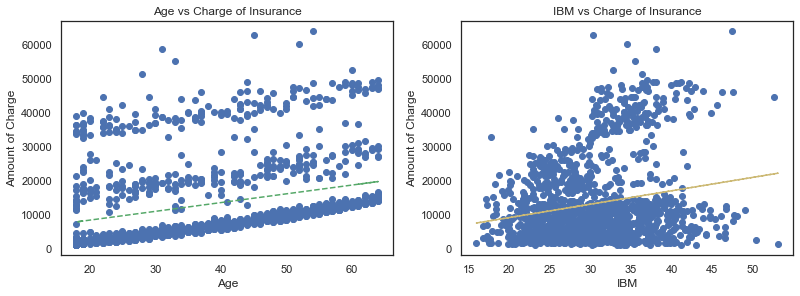

In [540]:
fg = plt.figure(figsize=(11, 4), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0])
plt.scatter(df.Age, df.Charge)
z = np.polyfit(df.Age, df.Charge, 1,)
line_function = np.poly1d(z)
plt.plot(df.Age,line_function(df.Age),'g--')
plt.xlabel('Age')
plt.ylabel('Amount of Charge')
plt.title('Age vs Charge of Insurance')

fig_ax_2 = fg.add_subplot(gs[0, 1])
plt.scatter(df.BMI, df.Charge)
z = np.polyfit(df.BMI, df.Charge, 1)
line_function = np.poly1d(z)
plt.plot(df.BMI, line_function(df.BMI), "y--")
plt.xlabel('IBM')
plt.ylabel('Amount of Charge')
plt.title('IBM vs Charge of Insurance')

plt.show()

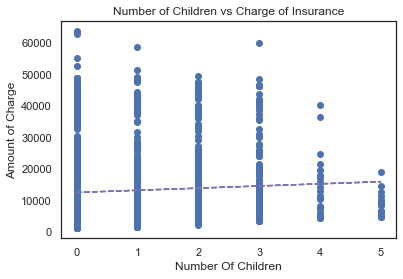

In [533]:
plt.scatter(df.NumberOfChildren, df.Charge)
z = np.polyfit(df.NumberOfChildren, df.Charge, 1)
line_function = np.poly1d(z)
plt.plot(df.NumberOfChildren,line_function(df.NumberOfChildren), "m--")
plt.xlabel('Number Of Children')
plt.ylabel('Amount of Charge')
plt.title('Number of Children vs Charge of Insurance')
plt.show()

**Histogram**

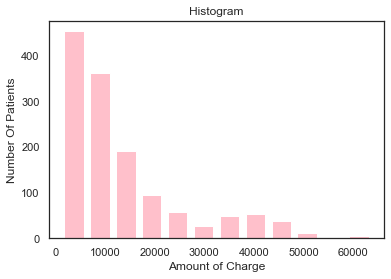

In [542]:
a = np.array(df['Charge'])
fig, ax = plt.subplots(figsize =(6, 4))
ax.hist(a, bins = 12,color='pink',rwidth=0.75)
plt.xlabel('Amount of Charge')
plt.ylabel('Number Of Patients')
plt.title('Histogram')
plt.show()

**Patient Population Distribution over Regions**

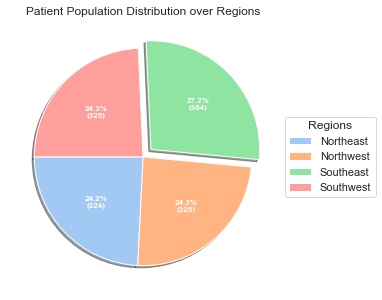

In [503]:
arrays = [df['Region'],
          df['Smoker']]
index = pd.MultiIndex.from_arrays(arrays, names=('Region', 'Smoker'))
df3 = pd.DataFrame({'Count': df['Age'].to_numpy().astype(np.float)},index=index)
region_dist = df3.groupby(level='Region').count().reset_index()

region_dist['percent'] = region_dist.Count.apply(lambda row: round(row * 100 / region_dist.Count.sum(), 2))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))
data = np.array(region_dist['Count'])

regions =  ['Northeast','Northwest','Southeast','Southwest']
colors = sns.color_palette('pastel')[0:5]
#colors = ['#FBB4AE', '#B3CDE3', '#CCEBC5', '#DECBE4', '#FED9A6', '#FFFFCC', '#E5D8BD', '#FDDAEC', '#F2F2F2']

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"),
                                  explode=(0, 0, 0.1, 0), startangle=180,shadow=True, colors = colors)
ax.legend(wedges, regions,title="Regions",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Patient Population Distribution over Regions")
plt.show()

**Average medical insurance costs by type of attribut**

Sex     Region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: Charge, dtype: float64
Sex     Region   
female  northeast    10591.929980
        northwest    10596.572843
        southeast    12587.261506
        southwest    10453.660658
male    northeast    11890.942381
        northwest    11569.561020
        southeast    15083.360816
        southwest    12499.550025
Name: Charge, dtype: float64


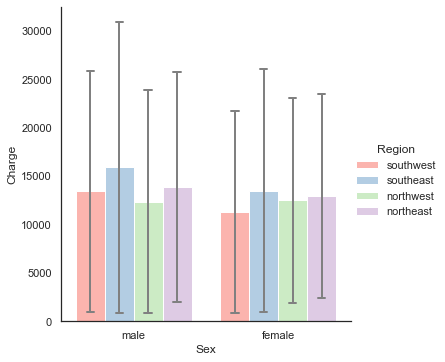

In [513]:
arrays = [df['Region'],
          df['Smoker']]
index = pd.MultiIndex.from_arrays(arrays, names=('Region', 'Smoker'))
df2 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)},index=index)
arrays = [df['Sex'], df['NumberOfChildren'], df['Smoker'], df['Region']]
index = pd.MultiIndex.from_arrays(arrays, names=('Sex', 'NumberOfChildren', 'Smoker', 'Region'))
df1 = pd.DataFrame({'Insurance Cost': df['Charge'].to_numpy().astype(np.float)},index=index)

sns.set_theme(style="white")
#colors = sns.color_palette('pastel')[0:9]
colors = ['#FBB4AE', '#B3CDE3', '#CCEBC5', '#DECBE4', '#FED9A6', '#FFFFCC', '#E5D8BD', '#FDDAEC', '#F2F2F2']
sns.catplot(x="Sex", y="Charge", hue="Region", kind="bar", data=df, palette = colors, order = ['male', 'female'],  
            capsize = 0.05, saturation = 8, errcolor = 'gray', errwidth = 2, ci = 'sd'  )
print(df.groupby(['Sex', 'Region']).mean()['Charge'])
print(df.groupby(['Sex', 'Region']).std()['Charge'])
plt.show()

**Diagram Age vs Insurance Charge with info about smoking and amount of children**

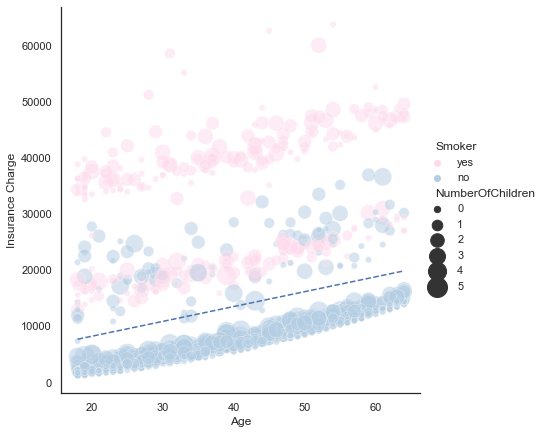

In [547]:
arrays = [df['Smoker'],df['Age'], df['NumberOfChildren']]
index = pd.MultiIndex.from_arrays(arrays, names=('Smoker', 'Age', 'NumberOfChildren'))
df2 = pd.DataFrame({'Insurance Charge': df['Charge'].to_numpy().astype(np.float)}, index=index)
avg_bmi_level = df2.groupby(level=0).mean().reset_index()
avg_age_level = df2.groupby(level='Age').mean().reset_index()
avg_numchild_level= df2.groupby(level='NumberOfChildren').mean().reset_index()

sns.set_theme(style="white")
colors = sns.color_palette('pastel')
sns.relplot(x="Age", y="Insurance Charge", hue="Smoker", size="NumberOfChildren",
           sizes=(40, 400), alpha=.5, palette=['#FDDAEC', '#B3CDE3'],
           height=6, data=df2)
z = np.polyfit(avg_age_level['Age'], avg_age_level['Insurance Charge'], 1)
line_function = np.poly1d(z)
plt.plot(avg_age_level['Age'], line_function(avg_age_level['Age']), "b--")
plt.show()

**Diagram Age vs Insurance Charge with info about smoking and BMI**

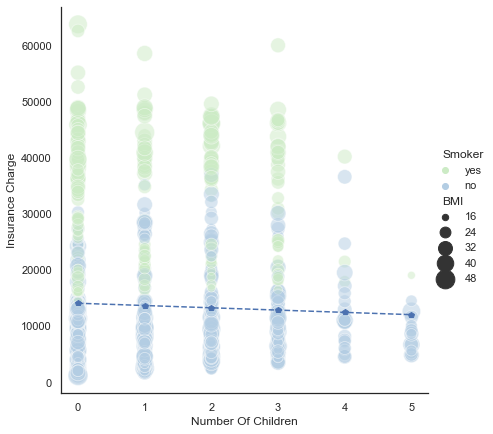

In [545]:
arrays = [df['Smoker'],df['Age'], df['NumberOfChildren'], df['BMI']]
index = pd.MultiIndex.from_arrays(arrays, names=('Smoker', 'Age', 'Number Of Children', 'BMI'))
df2 = pd.DataFrame({'Insurance Charge': df['Charge'].to_numpy().astype(np.float)}, index=index)

avg_bmi_level = df2.groupby(level=0).mean().reset_index()
avg_age_level = df2.groupby(level='Age').mean().reset_index()
avg_numchild_level= df2.groupby(level='Number Of Children').mean().reset_index()

sns.set_theme(style="white")
sns.relplot(x="Number Of Children", y="Insurance Charge", hue="Smoker", size="BMI",
           sizes=(40, 400), alpha=.5, palette=['#CCEBC5','#B3CDE3'],height=6, data=df2)
z = np.polyfit(avg_numchild_level['Number Of Children'], avg_numchild_level['Insurance Charge'], 1)
line_function = np.poly1d(z)
plt.plot(avg_numchild_level['Number Of Children'], line_function(avg_numchild_level['Number Of Children']), "p--")
plt.show()
